In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#this adds the plot to the same cells in jup notebook instead of a new window
import seaborn as sns
#Seaborn is used for statistical data visualization in Python(more different plots than matplotlib)
sns.set()
train = pd.read_csv("Desktop/Titanic/train.csv")
test = pd.read_csv("Desktop/Titanic/test.csv")
train.head() #display first 5 values of dataset
test.head()  #display last 5 values of dataset

  


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [53]:
train.shape
test.shape #does not contain y

(418, 11)

In [54]:
train.describe()
#it is a function of pandas
#train['Age'].isnull().sum() = 177 = 891-714
#25%,50%,75% give the percentiles. 
#The percentile gives you the actual data that is located
#in that percentage of the data (undoubtedly after the array is sorted)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
train.describe(include=['O'])
#This shows that there are duplicate 
#Ticket number and Cabins shared. 
#The highest number of duplicate ticket number is "CA. 2343". 
#It has been repeated 7 times. Similarly, the highest number of people
#using the same cabin is 4. They are using cabin number "C23 C25 C27".
#We also see that 644 people were embarked from port "S".
#Among 891 rows, 577 were Male and the rest were Female

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Homer, Mr. Harry (""Mr E Haven"")",male,347082,G6,S
freq,1,577,7,4,644


In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
survived = train[(train['Survived'] == 1)]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [59]:
train['Name']


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [60]:
train.Pclass.value_counts()
#counts passengers in each class

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [61]:
train.groupby("Pclass").Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [62]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


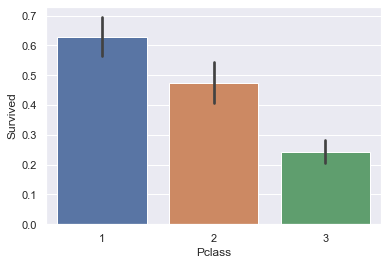

In [63]:
sns.barplot(x="Pclass",y="Survived",data=train)

In [64]:
train.Sex.value_counts()
train.groupby('Sex').Survived.value_counts()


Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [65]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


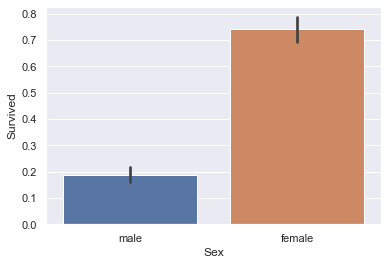

In [66]:
sns.barplot(x="Sex",y="Survived",data=train)

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347


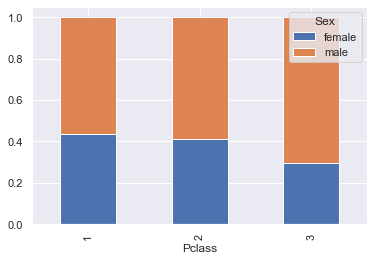

In [67]:
tab=pd.crosstab(train["Pclass"],train["Sex"])
print(tab)
tab.div(tab.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
#stacked:stacks the values on top of each other

plt.xlabel=("Pclass")
plt.ylabel=("Percentage")

C:\Users\SMH_2\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SMH_2\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


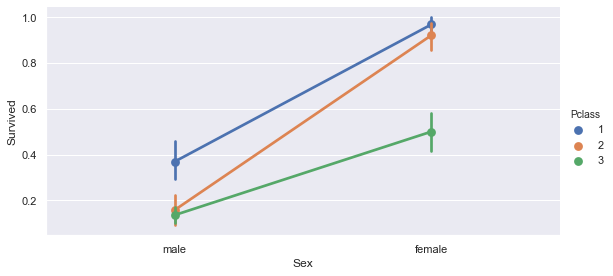

In [68]:
sns.factorplot("Sex","Survived",hue="Pclass",size=4,aspect=2,data=train)

C:\Users\SMH_2\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


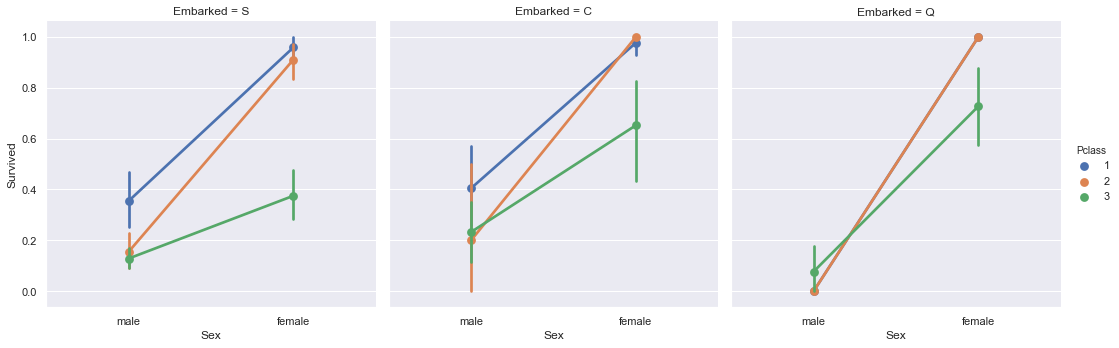

In [69]:
sns.factorplot(x="Sex",y="Survived",hue="Pclass",col='Embarked',data=train)

In [70]:
train_test_data=[train,test] #combining datasets
for dataset in train_test_data:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.')
 
    #Find letters from A-Z and a-z followed by(indicated by +)
    #a special character(indicated by \) dot(indicated by .)
    #regex
    #

In [71]:
   train.head()
train['Title'].isnull() .sum()

0

In [72]:
pd.crosstab(train['Title'],train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [73]:
#now training the model :

In [74]:
columns_target=['Survived']  

In [91]:
columns_train=['Age','Pclass','Sex','Fare']
X_train=train[columns_train]   #load data-input features into x X(890x4)
Y_train=train[columns_target]  #Y(890x1)
X_train.shape  #(891, 4)
columns_test=['Age','Pclass','Sex','Fare']
X_test=train[columns_test] 

In [92]:
#Check if there are any NaN values in the data, one by one. Age column, you find 177 null values

X_train['Sex'].isnull().sum()
X_train['Pclass'].isnull().sum()
X_train['Fare'].isnull().sum()
X_train['Age'].isnull() .sum()
# >>177
# Let us fill these values with median of all other values in the attribute Age which are not NaN
#fillna() function to fill out the missing values in the given series object.
X_train['Age']=X_train['Age'].fillna(X_train['Age'].median())
X_test['Age']=X_test['Age'].fillna(X_test['Age'].median())
X_train['Age'].head() 
X_train['Age'].isnull() .sum() #you get 0 when you run this

C:\Users\SMH_2\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\SMH_2\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


0

In [93]:
#In sklearn we cannot pass string as a categorical variable
#sex is a categorical variable with values female and male
#We convert it to integer values F:1, M:0
#Lets create a dictionary 
d={'male':0,'female':1}
X_train['Sex']=X_train['Sex'].apply(lambda x:d[x])
X_train['Sex'].head() 


C:\Users\SMH_2\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [94]:
X_train.head()

,Age,Pclass,Sex,Fare
0,22.0,3,0,7.2500
1,38.0,1,1,71.2833
2,26.0,3,1,7.9250
3,35.0,1,1,53.1000
4,35.0,3,0,8.0500


In [95]:
d={'male':0,'female':1}
X_test['Sex']=X_test['Sex'].apply(lambda x:d[x])
X_test['Sex'].head() 

C:\Users\SMH_2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [98]:
from sklearn import svm 
clf=svm.LinearSVC()   #dataset it divided by limes using svms
clf.fit(X_train,Y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, Y_train) * 100, 2)
print (acc_svc)

78.45


C:\Users\SMH_2\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\SMH_2\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


NameError: name 'SVC' is not defined